# Detección de ataques en red

## Conjunto de datos

### Descripción
NSL-KDD is a data set suggested to solve some of the inherent problems of the KDD'99 data set which are mentioned in. Although, this new version of the KDD data set still suffers from some of the problems discussed by McHugh and may not be a perfect representative of existing real networks, because of the lack of public data sets for network-based IDSs, we believe it still can be applied as an effective benchmark data set to help researchers compare different intrusion detection methods. Furthermore, the number of records in the NSL-KDD train and test sets are reasonable. This advantage makes it affordable to run the experiments on the complete set without the need to randomly select a small portion. Consequently, evaluation results of different research work will be consistent and comparable.

### Ficheros de datos
* <span style="color:green">**KDDTrain+.ARFF**: The full NSL-KDD train set with binary labels in ARFF format</span>
* <span style="color:green">**KDDTrain+.TXT**: The full NSL-KDD train set including attack-type labels and difficulty level in CSV format</span>
* KDDTrain+_20Percent.ARFF:	A 20% subset of the KDDTrain+.arff file
* KDDTrain+_20Percent.TXT:	A 20% subset of the KDDTrain+.txt file
* KDDTest+.ARFF:	The full NSL-KDD test set with binary labels in ARFF format
* KDDTest+.TXT:	The full NSL-KDD test set including attack-type labels and difficulty level in CSV format
* KDDTest-21.ARFF:	A subset of the KDDTest+.arff file which does not include records with difficulty level of 21 out of 21
* KDDTest-21.TXT:	A subset of the KDDTest+.txt file which does not include records with difficulty level of 21 out of 21

### Descarga de los ficheros de datos
https://iscxdownloads.cs.unb.ca/iscxdownloads/NSL-KDD/#NSL-KDD

#### Referencias adicionales sobre el conjunto de datos
_M. Tavallaee, E. Bagheri, W. Lu, and A. Ghorbani, “A Detailed Analysis of the KDD CUP 99 Data Set,” Submitted to Second IEEE Symposium on Computational Intelligence for Security and Defense Applications (CISDA), 2009._

An **ARFF (Attribute-Relation File Format)** file is an ASCII text file that describes a list of instances sharing a set of attributes. ARFF files were developed by the Machine Learning Project at the Department of Computer Science of The University of Waikato for use with the Weka machine learning software. Más información: https://www.cs.waikato.ac.nz/ml/weka/arff.html

In [1]:
#!pip install liac-arff==2.5.0

In [2]:
import os
import arff
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    confusion_matrix, plot_confusion_matrix, accuracy_score,
    precision_score, recall_score, f1_score, plot_roc_curve,
    )


%matplotlib inline

DATA_PATH = "datasets/NSL-KDD"

print(os.listdir(DATA_PATH))

# Lectura del conjunto de datos que se encuentra en formato .arff
with open(DATA_PATH + "/KDDTrain+.arff", "r") as train_set:
    data = arff.load(train_set)

data.keys()

['KDDTrain+_20Percent.arff', 'KDDTest-21.arff', 'KDDTrain+_20Percent.txt', 'KDDTest+.txt', 'KDDTest-21.txt', 'KDDTrain+.txt', 'KDDTrain+.arff', 'KDDTest+.arff']


dict_keys(['description', 'relation', 'attributes', 'data'])

## Visualización de los datos

El proceso de visualización siempre debe realizarse sobre el training set y apartando el test set. Esto evita que nuestro cerebro genere intuiciones del test set que podemos incorporar en nuestro modelo.  

Una buena práctica es crear una copia del training set y jugar con ella. De esta manera, si realizamos transformaciones que dañan el tranning set, el original no se ve afectado.

Vemos la estructura de nuestro datos para luego convertirlos en un dataframe.

In [3]:
data["attributes"]

[('duration', 'REAL'),
 ('protocol_type', ['tcp', 'udp', 'icmp']),
 ('service',
  ['aol',
   'auth',
   'bgp',
   'courier',
   'csnet_ns',
   'ctf',
   'daytime',
   'discard',
   'domain',
   'domain_u',
   'echo',
   'eco_i',
   'ecr_i',
   'efs',
   'exec',
   'finger',
   'ftp',
   'ftp_data',
   'gopher',
   'harvest',
   'hostnames',
   'http',
   'http_2784',
   'http_443',
   'http_8001',
   'imap4',
   'IRC',
   'iso_tsap',
   'klogin',
   'kshell',
   'ldap',
   'link',
   'login',
   'mtp',
   'name',
   'netbios_dgm',
   'netbios_ns',
   'netbios_ssn',
   'netstat',
   'nnsp',
   'nntp',
   'ntp_u',
   'other',
   'pm_dump',
   'pop_2',
   'pop_3',
   'printer',
   'private',
   'red_i',
   'remote_job',
   'rje',
   'shell',
   'smtp',
   'sql_net',
   'ssh',
   'sunrpc',
   'supdup',
   'systat',
   'telnet',
   'tftp_u',
   'tim_i',
   'time',
   'urh_i',
   'urp_i',
   'uucp',
   'uucp_path',
   'vmnet',
   'whois',
   'X11',
   'Z39_50']),
 ('flag',
  ['OTH',
   'REJ'

In [4]:
# Parseamos los atributos para obtener únicamente los nombres
columns = [i[0] for i in data["attributes"]]
columns

['duration',
 'protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'class']

In [5]:
# Leemos el conjunto de datos con Pandas para facilitar la manipulación
df_original = pd.DataFrame(data["data"], columns=columns)
# Copia del conjunto de datos
df_copy = df_original.copy()
df_copy.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.0,tcp,ftp_data,SF,491.0,0.0,0,0.0,0.0,0.0,...,25.0,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0.0,udp,other,SF,146.0,0.0,0,0.0,0.0,0.0,...,1.0,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0.0,tcp,private,S0,0.0,0.0,0,0.0,0.0,0.0,...,26.0,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0.0,tcp,http,SF,232.0,8153.0,0,0.0,0.0,0.0,...,255.0,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0.0,tcp,http,SF,199.0,420.0,0,0.0,0.0,0.0,...,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
5,0.0,tcp,private,REJ,0.0,0.0,0,0.0,0.0,0.0,...,19.0,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
6,0.0,tcp,private,S0,0.0,0.0,0,0.0,0.0,0.0,...,9.0,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
7,0.0,tcp,private,S0,0.0,0.0,0,0.0,0.0,0.0,...,15.0,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
8,0.0,tcp,remote_job,S0,0.0,0.0,0,0.0,0.0,0.0,...,23.0,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
9,0.0,tcp,private,S0,0.0,0.0,0,0.0,0.0,0.0,...,13.0,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


Mostramos la información sobre nuestro dataframe.

In [6]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  float64
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  float64
 5   dst_bytes                    125973 non-null  float64
 6   land                         125973 non-null  object 
 7   wrong_fragment               125973 non-null  float64
 8   urgent                       125973 non-null  float64
 9   hot                          125973 non-null  float64
 10  num_failed_logins            125973 non-null  float64
 11  logged_in                    125973 non-null  object 
 12  num_compromised              125973 non-null  float64
 13 

Convertimos las columnas de tipo "object" a tipo float ya que pueden ser útiles para el modelo.

In [7]:
df_copy = (
    df_copy
    .assign(
        land=lambda df: pd.to_numeric(df_copy["land"], downcast="float"),
        logged_in=lambda df: pd.to_numeric(df_copy["logged_in"], downcast="float"),
        is_guest_login=lambda df: pd.to_numeric(df_copy["is_guest_login"], downcast="float"),
        is_host_login=lambda df: pd.to_numeric(df_copy["is_host_login"], downcast="float"),
    )
)

df_copy.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.0,tcp,ftp_data,SF,491.0,0.0,0.0,0.0,0.0,0.0,...,25.0,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0.0,udp,other,SF,146.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0.0,tcp,private,S0,0.0,0.0,0.0,0.0,0.0,0.0,...,26.0,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0.0,tcp,http,SF,232.0,8153.0,0.0,0.0,0.0,0.0,...,255.0,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0.0,tcp,http,SF,199.0,420.0,0.0,0.0,0.0,0.0,...,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


A continuación se muestra la información estadística de nuestros datos (variables numéricas).

In [8]:
# Mostrar información estadística sobre el conjunto de datos
df_copy.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,5.870331e+06,4.021269e+06,0.014085,0.253530,0.014366,2.149968,0.045239,0.488893,23.942042,...,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Y para las variables categóricas.

In [9]:
columns_object = list(df_copy.select_dtypes(include=["object"]).columns)
for i in columns_object:
    print(df_copy[i].value_counts(), "\n")

tcp     102689
udp      14993
icmp      8291
Name: protocol_type, dtype: int64 

http         40338
private      21853
domain_u      9043
smtp          7313
ftp_data      6860
             ...  
tftp_u           3
harvest          2
http_8001        2
aol              2
http_2784        1
Name: service, Length: 70, dtype: int64 

SF        74945
S0        34851
REJ       11233
RSTR       2421
RSTO       1562
S1          365
SH          271
S2          127
RSTOS0      103
S3           49
OTH          46
Name: flag, dtype: int64 

normal     67343
anomaly    58630
Name: class, dtype: int64 



Observamos que las variables categóricas se encuentran desbalanceadas.

<AxesSubplot:>

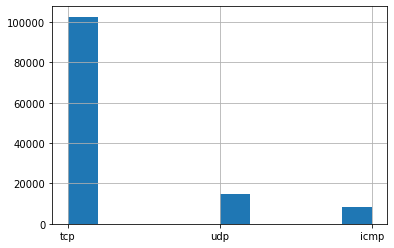

In [10]:
df_copy["protocol_type"].hist()

<AxesSubplot:>

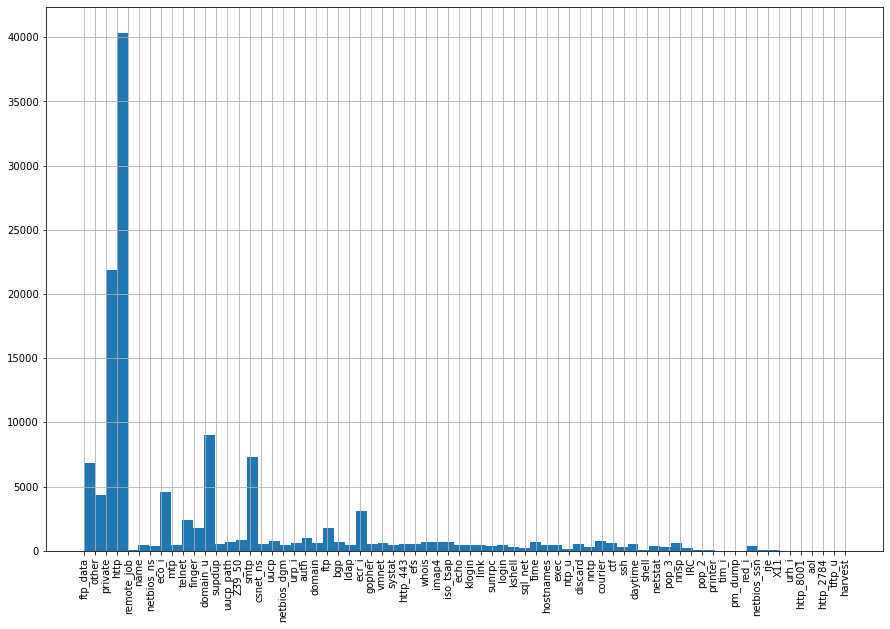

In [11]:
df_copy["service"].hist(figsize=(15, 10), xrot=90, bins=len(df_copy["service"].value_counts()))

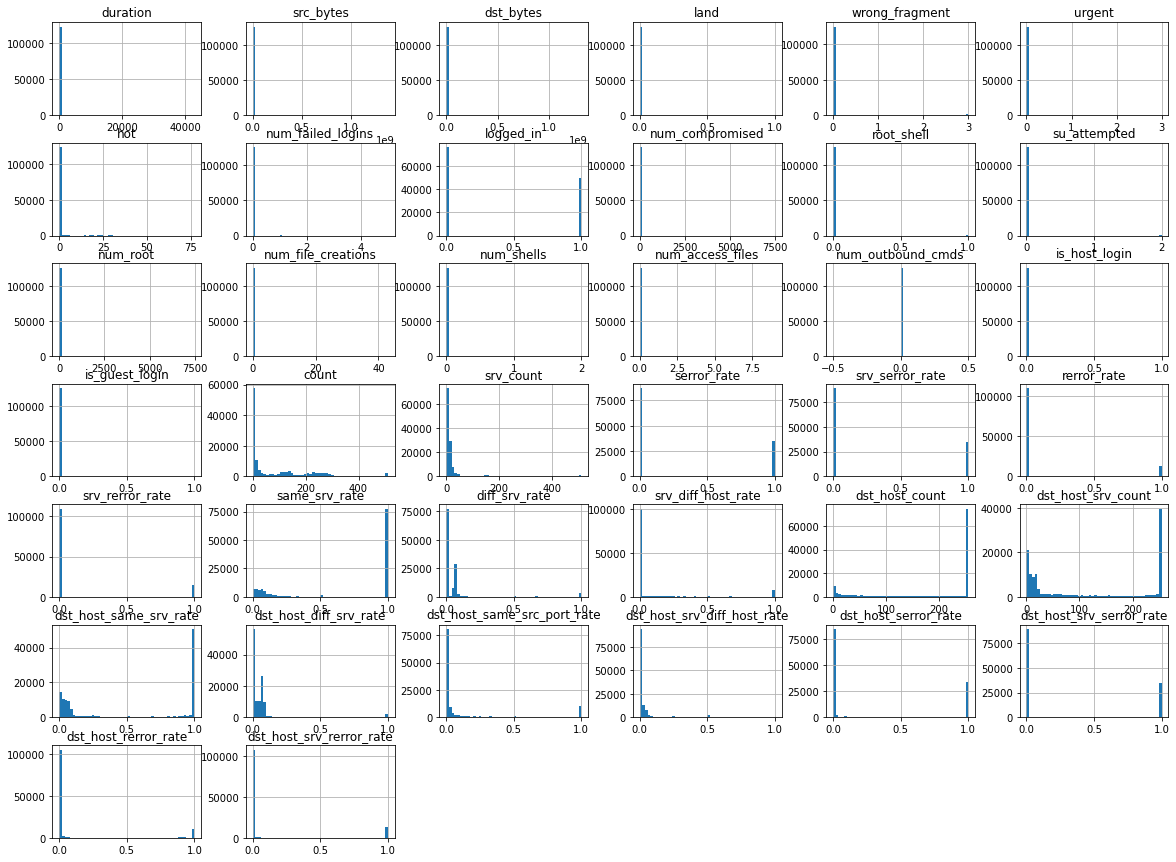

In [12]:
df_copy.hist(bins=50, figsize=(20, 15))
plt.show()

Para la variables "service" vemos que muchos de los eventos tienen la etiqueta "anomaly".

In [13]:
minor_values = ["http_2784", "aol", "harvest", "http_8001", "tftp_u", "pm_dump", "tim_i", "red_i"]
df_services = df_copy[df_copy["service"].isin(minor_values)]
df_services

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
1143,0.0,icmp,tim_i,SF,564.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.00,0.00,1.00,0.0,0.00,0.0,0.00,0.0,anomaly
1352,0.0,tcp,pm_dump,SF,44.0,672.0,0.0,0.0,0.0,0.0,...,1.0,0.01,0.10,0.01,0.0,0.01,0.0,0.02,0.0,anomaly
1680,0.0,icmp,red_i,SF,91.0,0.0,0.0,0.0,0.0,0.0,...,7.0,0.05,0.02,0.05,0.0,0.00,0.0,0.11,0.0,normal
11124,0.0,tcp,http_8001,S0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.00,1.00,0.00,0.0,0.13,1.0,0.87,0.0,anomaly
13798,0.0,icmp,red_i,SF,91.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.01,0.02,0.01,0.0,0.00,0.0,0.11,0.0,normal
14098,0.0,icmp,tim_i,SF,564.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.00,0.00,1.00,0.0,0.00,0.0,0.00,0.0,anomaly
16323,0.0,tcp,pm_dump,SF,44.0,192.0,0.0,0.0,0.0,0.0,...,1.0,0.00,0.44,0.00,0.0,0.00,0.0,0.40,0.0,anomaly
19187,0.0,tcp,pm_dump,SF,44.0,556.0,0.0,0.0,0.0,0.0,...,1.0,0.01,0.11,0.01,0.0,0.00,0.0,0.03,0.0,anomaly
21751,0.0,icmp,red_i,SF,91.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.04,0.02,0.04,0.0,0.00,0.0,0.11,0.0,normal
25718,0.0,tcp,aol,REJ,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.00,1.00,0.00,0.0,0.03,0.0,0.97,1.0,anomaly


Por lo tanto duplicaremos esto registros en el dataset original. El objetivo final es que podamos mantener la proporción de datos cuando realicemos el split de entrenamiento, validación y test.

In [14]:
df_services = df_copy[df_copy["service"].isin(minor_values)]
df_copy = df_copy.append(df_copy[df_copy["service"].isin(minor_values)], ignore_index=True)
df_copy = df_copy.append(df_copy[df_copy["service"].isin(minor_values)], ignore_index=True)
df_copy = df_copy.append(df_copy[df_copy["service"].isin(minor_values)], ignore_index=True)
df_copy = df_copy.append(df_copy[df_copy["service"].isin(minor_values)], ignore_index=True)

df_copy["service"].value_counts()

http         40338
private      21853
domain_u      9043
smtp          7313
ftp_data      6860
             ...  
harvest         32
http_8001       32
aol             32
http_2784       16
urh_i           10
Name: service, Length: 70, dtype: int64

### Particionado aleatorio y Stratified Sampling

Sklearn tiene implementa la función **train_test_split**, sin embargo, esta función por defecto realiza un particionado del conjunto de datos aleatorio para cada vez que se ejecuta el script. Aún añadiendo una semilla fija para generación aleatoria, cada vez que carguemos de nuevo el conjunto de datos se generarán nuevos subconjuntos. Esto puede ocasionar que después de mucho intentos, el algoritmo "vea" todo el conjunto de datos.

Para solucionar este problema, Sklearn ha introducido el parámetro **shuffle** en la función **train_test_split**.

Estos métodos para dividir el conjunto de datos estan bien si tenemos un conjunto de datos muy grande, pero si no es así, corremos el riesgo de introducir **sampling bias**.

Para evitar esto, se utiliza un metodo de sampling que se llama **Stratified sampling**. La población es dividida en subconjuntos homogéneos llamados **strata**. El objetivo es que no quede ninguna característica del conjunto de datos sin representación en ninguno de los conjuntos de datos para una o más características en particular.

Sklearn introduce el parámetro **stratify** en la función **train_test_split** para controlar este comportamiento.

_This stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify._

_For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's._

_https://stackoverflow.com/a/38889389_

Así pues, separamos el conjunto de datos en 60% para entrenamiento, 20% para validación y otro 20% para test. Preservaremos la proporción de las variables "protocol_type" y "service" en nuestros datos.

In [15]:
# Si shuffle=False, el conjunto de datos no mezclará antes del particionado
df_train, df_test = train_test_split(
    df_copy, test_size=0.4, random_state=5, shuffle=True, stratify=df_copy[["protocol_type", "service"]])

df_validation, df_test = train_test_split(
    df_test, test_size=0.5, random_state=5, shuffle=True, stratify=df_test[["protocol_type", "service"]])

Podemos ver que se mantiene la proporción de la variable "protocol_type".

<AxesSubplot:title={'center':'protocol_type validation'}>

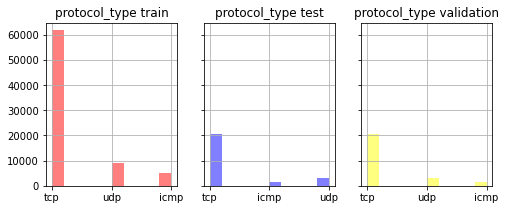

In [16]:
fig, ax = plt.subplots(1, 3, sharex="col", sharey="row", figsize=(8, 3))

ax[0].set_title("protocol_type train")
df_train["protocol_type"].hist(ax=ax[0], alpha=0.5, color="red")

ax[1].set_title("protocol_type test")
df_test["protocol_type"].hist(ax=ax[1], alpha=0.5, color="blue")

ax[2].set_title("protocol_type validation")
df_validation["protocol_type"].hist(ax=ax[2], alpha=0.5, color="yellow")

In [17]:
print("Longitud del Training Set:", len(df_train))
print("Longitud del Validation Set:", len(df_validation))
print("Longitud del Test Set:", len(df_test))

Longitud del Training Set: 75862
Longitud del Validation Set: 25288
Longitud del Test Set: 25288


### Buscando correlaciones

* Se puede calcular el coeficiente de correlación estándar para ver la correlación entre cada par de atributos
* El coeficiente de correlación, solo mide **correlaciones lineales**, esto quiere decir que si x va hacia arriba, mediría si y va hacia arriba o hacia abajo.
* **Hay que intentar buscar correlaciones sobre todo con el atributo objetivo (el que queremeos predecir), en este caso _class_**

A continuación se muestra la matriz de correlación de nuestros datos (numéricos).

In [18]:
corr = df_train.corr()
corr

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
duration,1.000000,0.084107,0.044721,-0.001629,-0.009867,-5.745833e-04,0.003119,0.013337,-0.064741,0.033843,...,0.052069,-0.111290,-0.117633,0.256449,0.233037,-0.028566,-0.065829,-0.065183,0.175444,0.200165
src_bytes,0.084107,1.000000,-0.000033,-0.000109,-0.000661,-5.173476e-05,-0.000152,-0.000209,-0.003580,-0.000075,...,-0.007505,-0.006345,-0.005949,0.000887,-0.000122,-0.001576,-0.004768,-0.004640,-0.001469,0.013246
dst_bytes,0.044721,-0.000033,1.000000,-0.000086,-0.000519,-2.240941e-05,-0.000468,0.000588,-0.003969,0.001126,...,0.003561,-0.005445,-0.005886,0.014087,0.014948,-0.001596,-0.003696,-0.003606,0.015259,0.014606
land,-0.001629,-0.000109,-0.000086,1.000000,-0.001278,-1.000560e-04,-0.001381,-0.000407,-0.011715,-0.000152,...,-0.026210,-0.014600,0.011858,-0.004534,0.034636,0.071268,0.019722,0.015100,-0.005259,-0.005470
wrong_fragment,-0.009867,-0.000661,-0.000519,-0.001278,1.000000,-6.060620e-04,-0.008365,-0.002466,-0.070960,-0.000922,...,0.040014,-0.043658,-0.046801,0.057623,0.037666,-0.015280,-0.050468,-0.054858,0.028212,-0.033131
urgent,-0.000575,-0.000052,-0.000022,-0.000100,-0.000606,1.000000e+00,-0.000655,-0.000193,0.003842,0.000006,...,-0.010602,-0.007029,-0.001534,0.015660,0.006041,0.005970,-0.003984,-0.004296,-0.002677,-0.002594
hot,0.003119,-0.000152,-0.000468,-0.001381,-0.008365,-6.549821e-04,1.000000,0.005330,0.116883,0.002666,...,-0.015346,-0.053086,-0.036220,-0.009201,-0.033929,-0.025100,-0.057552,-0.057788,-0.030627,-0.031819
num_failed_logins,0.013337,-0.000209,0.000588,-0.000407,-0.002466,-1.931265e-04,0.005330,1.000000,-0.007482,0.005051,...,-0.021788,-0.022908,-0.003321,-0.001083,-0.010625,-0.008109,-0.010914,-0.012264,0.021759,0.018809
logged_in,-0.064741,-0.003580,-0.003969,-0.011715,-0.070960,3.841752e-03,0.116883,-0.007482,1.000000,0.012994,...,-0.398876,0.623924,0.602684,-0.258520,-0.160250,-0.054949,-0.488002,-0.490493,-0.277412,-0.272979
num_compromised,0.033843,-0.000075,0.001126,-0.000152,-0.000922,6.218562e-06,0.002666,0.005051,0.012994,1.000000,...,-0.011268,-0.009434,-0.004617,0.001830,-0.003415,-0.001991,-0.004589,-0.004910,-0.003501,-0.002828


<AxesSubplot:title={'center':'Correlation Matrix'}>

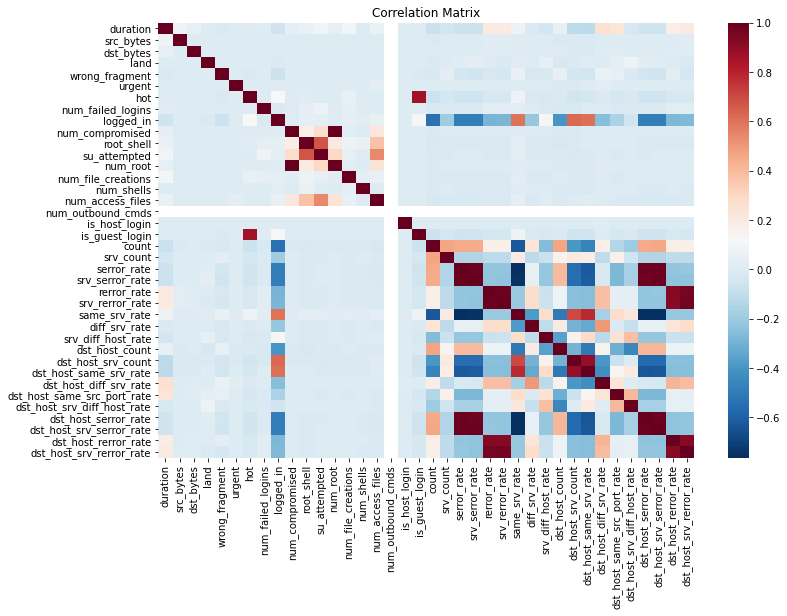

In [19]:
plt.figure(figsize=(12, 8))
plt.title("Correlation Matrix")
sns.heatmap(corr, cmap="RdBu_r", annot=False)

Construiremos un nuevo dataframe donde a la variable "class" le aplicaremos un `LabelEncoder` y así ver la correlación de los datos frente a esta variable.

In [20]:
df_copy_class = df_copy.copy()
df_copy_class["class"] = LabelEncoder().fit_transform(df_copy_class["class"])
df_copy_class.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.0,tcp,ftp_data,SF,491.0,0.0,0.0,0.0,0.0,0.0,...,25.0,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0.0,udp,other,SF,146.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0.0,tcp,private,S0,0.0,0.0,0.0,0.0,0.0,0.0,...,26.0,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0.0,tcp,http,SF,232.0,8153.0,0.0,0.0,0.0,0.0,...,255.0,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0.0,tcp,http,SF,199.0,420.0,0.0,0.0,0.0,0.0,...,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1


In [21]:
corr_class = df_copy_class.corr()
corr_class["class"].sort_values(ascending=False)

class                          1.000000
same_srv_rate                  0.750937
dst_host_srv_count             0.719993
dst_host_same_srv_rate         0.690648
logged_in                      0.688176
srv_diff_host_rate             0.119176
is_guest_login                 0.039219
num_access_files               0.036638
su_attempted                   0.022410
num_file_creations             0.021235
root_shell                     0.020253
hot                            0.013072
num_root                       0.011433
num_compromised                0.010181
num_shells                     0.009457
num_failed_logins              0.003752
urgent                         0.002783
is_host_login                  0.002624
srv_count                     -0.000660
dst_bytes                     -0.004109
src_bytes                     -0.005909
land                          -0.007176
duration                      -0.048679
dst_host_srv_diff_host_rate   -0.062168
dst_host_same_src_port_rate   -0.092684


Ahora la matriz de correlación contiene la variable "class".

<AxesSubplot:title={'center':'Correlation Matrix'}>

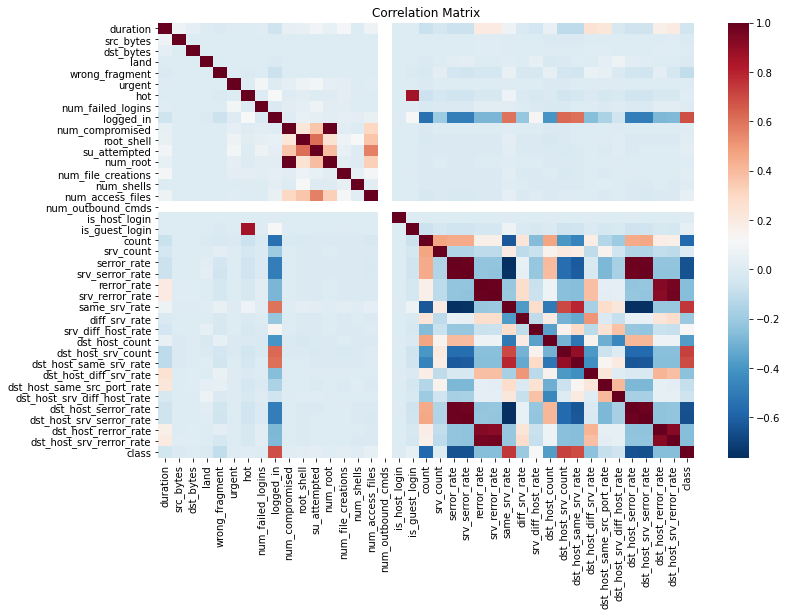

In [22]:
plt.figure(figsize=(12, 8))
plt.title("Correlation Matrix")
sns.heatmap(corr_class, cmap="RdBu_r", annot=False)

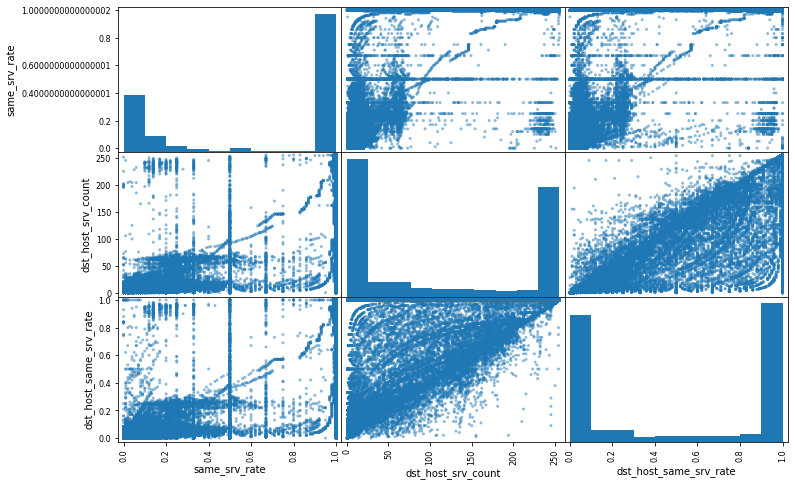

In [23]:
# Representar gráficamente las correlaciones
from pandas.plotting import scatter_matrix

attributes = ["same_srv_rate", "dst_host_srv_count", "class", "dst_host_same_srv_rate"]

scatter_matrix(df_copy[attributes], figsize=(12, 8))
plt.show()

## Preprocesamiento del conjunto de datos

### Limpiando el conjunto de datos

La mayoria de los algoritmos de Machine Learning no pueden trabajar sobre caracteristicas que contengan valores nulos. Si el conjunto de datos contine valores nulos debemos aplicar alguna de las siguientes técnicas:

* Eliminar las filas correspondientes
* Eliminar el atributo (columna) correspondiente
* Rellenarlos con un valor determinado (cero, media ...)

Primero comprobamos si existe algún atributo con valores nulos.

In [24]:
df_train.isna().any()

duration                       False
protocol_type                  False
service                        False
flag                           False
src_bytes                      False
dst_bytes                      False
land                           False
wrong_fragment                 False
urgent                         False
hot                            False
num_failed_logins              False
logged_in                      False
num_compromised                False
root_shell                     False
su_attempted                   False
num_root                       False
num_file_creations             False
num_shells                     False
num_access_files               False
num_outbound_cmds              False
is_host_login                  False
is_guest_login                 False
count                          False
srv_count                      False
serror_rate                    False
srv_serror_rate                False
rerror_rate                    False
s

Al no existir valores nulos en los datos pasaremos directamente a construir nuevos conjuntos de datos en función de las variables input y target para el modelo.

In [25]:
df_copy = df_copy.drop("class", axis=1)
x_train = df_train.drop("class", axis=1)
y_train = df_train["class"].copy()
x_validation = df_validation.drop("class", axis=1)
y_validation = df_validation["class"].copy()
x_test = df_test.drop("class", axis=1)
y_test = df_test["class"].copy()

#### Extra1: Eliminamos las filas con valores nulos

Para ilustrar esta sección vamos a añadir algunos valores nulos a algunas características del conjunto de datos

In [26]:
# Copiamos el conjunto de datos para no alterar el original
x_train_copy = x_train.copy()

x_train_copy.loc[(x_train_copy["src_bytes"] > 400) & (x_train_copy["src_bytes"] < 800), "src_bytes"] = np.nan
x_train_copy.loc[(x_train_copy["dst_bytes"] > 500) & (x_train_copy["dst_bytes"] < 2000), "dst_bytes"] = np.nan
x_train_copy

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
34950,0.0,tcp,whois,S0,0.0,0.0,0.0,0.0,0.0,0.0,...,255.0,17.0,0.07,0.06,0.00,0.00,1.0,1.00,0.00,0.0
120560,0.0,tcp,private,S0,0.0,0.0,0.0,0.0,0.0,0.0,...,255.0,5.0,0.02,0.06,0.00,0.00,1.0,1.00,0.00,0.0
15742,0.0,tcp,private,S0,0.0,0.0,0.0,0.0,0.0,0.0,...,255.0,11.0,0.04,0.08,0.00,0.00,1.0,1.00,0.00,0.0
91475,0.0,udp,private,SF,1.0,0.0,0.0,0.0,0.0,0.0,...,255.0,17.0,0.07,0.16,0.47,0.00,0.0,0.00,0.46,0.0
66051,0.0,tcp,http,REJ,0.0,0.0,0.0,0.0,0.0,0.0,...,255.0,11.0,0.04,0.07,0.00,0.00,0.0,0.00,1.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123194,0.0,tcp,http,SF,167.0,290.0,0.0,0.0,0.0,0.0,...,1.0,255.0,1.00,0.00,1.00,0.05,0.0,0.01,0.00,0.0
1385,0.0,tcp,private,S0,0.0,0.0,0.0,0.0,0.0,0.0,...,255.0,12.0,0.05,0.07,0.00,0.00,1.0,1.00,0.00,0.0
119864,1.0,tcp,finger,SF,10.0,139.0,0.0,0.0,0.0,0.0,...,252.0,17.0,0.07,0.02,0.00,0.00,0.0,0.00,0.00,0.0
118564,3483.0,udp,other,SF,146.0,105.0,0.0,0.0,0.0,0.0,...,255.0,1.0,0.00,0.69,0.96,0.00,0.0,0.00,0.00,0.0


In [27]:
# Comprobamos si existe algún atributo con valores nulos
x_train_copy.isna().any()

duration                       False
protocol_type                  False
service                        False
flag                           False
src_bytes                       True
dst_bytes                       True
land                           False
wrong_fragment                 False
urgent                         False
hot                            False
num_failed_logins              False
logged_in                      False
num_compromised                False
root_shell                     False
su_attempted                   False
num_root                       False
num_file_creations             False
num_shells                     False
num_access_files               False
num_outbound_cmds              False
is_host_login                  False
is_guest_login                 False
count                          False
srv_count                      False
serror_rate                    False
srv_serror_rate                False
rerror_rate                    False
s

In [28]:
# Eliminamos las filas con valores nulos
x_train_copy.dropna(subset=["src_bytes", "dst_bytes"], inplace=True)
x_train_copy

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
34950,0.0,tcp,whois,S0,0.0,0.0,0.0,0.0,0.0,0.0,...,255.0,17.0,0.07,0.06,0.00,0.00,1.0,1.00,0.00,0.0
120560,0.0,tcp,private,S0,0.0,0.0,0.0,0.0,0.0,0.0,...,255.0,5.0,0.02,0.06,0.00,0.00,1.0,1.00,0.00,0.0
15742,0.0,tcp,private,S0,0.0,0.0,0.0,0.0,0.0,0.0,...,255.0,11.0,0.04,0.08,0.00,0.00,1.0,1.00,0.00,0.0
91475,0.0,udp,private,SF,1.0,0.0,0.0,0.0,0.0,0.0,...,255.0,17.0,0.07,0.16,0.47,0.00,0.0,0.00,0.46,0.0
66051,0.0,tcp,http,REJ,0.0,0.0,0.0,0.0,0.0,0.0,...,255.0,11.0,0.04,0.07,0.00,0.00,0.0,0.00,1.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123194,0.0,tcp,http,SF,167.0,290.0,0.0,0.0,0.0,0.0,...,1.0,255.0,1.00,0.00,1.00,0.05,0.0,0.01,0.00,0.0
1385,0.0,tcp,private,S0,0.0,0.0,0.0,0.0,0.0,0.0,...,255.0,12.0,0.05,0.07,0.00,0.00,1.0,1.00,0.00,0.0
119864,1.0,tcp,finger,SF,10.0,139.0,0.0,0.0,0.0,0.0,...,252.0,17.0,0.07,0.02,0.00,0.00,0.0,0.00,0.00,0.0
118564,3483.0,udp,other,SF,146.0,105.0,0.0,0.0,0.0,0.0,...,255.0,1.0,0.00,0.69,0.96,0.00,0.0,0.00,0.00,0.0


#### Extra2: Rellenamos los valores nulos con un valor determinado

In [29]:
# Copiamos el conjunto de datos para no alterar el original
x_train_copy = x_train.copy()

x_train_copy.loc[(x_train_copy["src_bytes"] > 400) & (x_train_copy["src_bytes"] < 800), "src_bytes"] = np.nan
x_train_copy.loc[(x_train_copy["dst_bytes"] > 500) & (x_train_copy["dst_bytes"] < 2000), "dst_bytes"] = np.nan

# Rellenamos los valores nulos con la media de los valores del atributo
media_srcbytes = x_train_copy["src_bytes"].mean()
media_dstbytes = x_train_copy["dst_bytes"].mean()

# Un valor muy alto en el atributo puede disparar la media
# Rellenamos los valores con la mediana
#mediana_srcbytes = X_train_copy["src_bytes"].median()
#mediana_dstbytes = X_train_copy["dst_bytes"].median()

x_train_copy["src_bytes"].fillna(media_srcbytes, inplace=True)
x_train_copy["dst_bytes"].fillna(media_dstbytes, inplace=True)

x_train_copy

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
34950,0.0,tcp,whois,S0,0.0,0.0,0.0,0.0,0.0,0.0,...,255.0,17.0,0.07,0.06,0.00,0.00,1.0,1.00,0.00,0.0
120560,0.0,tcp,private,S0,0.0,0.0,0.0,0.0,0.0,0.0,...,255.0,5.0,0.02,0.06,0.00,0.00,1.0,1.00,0.00,0.0
15742,0.0,tcp,private,S0,0.0,0.0,0.0,0.0,0.0,0.0,...,255.0,11.0,0.04,0.08,0.00,0.00,1.0,1.00,0.00,0.0
91475,0.0,udp,private,SF,1.0,0.0,0.0,0.0,0.0,0.0,...,255.0,17.0,0.07,0.16,0.47,0.00,0.0,0.00,0.46,0.0
66051,0.0,tcp,http,REJ,0.0,0.0,0.0,0.0,0.0,0.0,...,255.0,11.0,0.04,0.07,0.00,0.00,0.0,0.00,1.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123194,0.0,tcp,http,SF,167.0,290.0,0.0,0.0,0.0,0.0,...,1.0,255.0,1.00,0.00,1.00,0.05,0.0,0.01,0.00,0.0
1385,0.0,tcp,private,S0,0.0,0.0,0.0,0.0,0.0,0.0,...,255.0,12.0,0.05,0.07,0.00,0.00,1.0,1.00,0.00,0.0
119864,1.0,tcp,finger,SF,10.0,139.0,0.0,0.0,0.0,0.0,...,252.0,17.0,0.07,0.02,0.00,0.00,0.0,0.00,0.00,0.0
118564,3483.0,udp,other,SF,146.0,105.0,0.0,0.0,0.0,0.0,...,255.0,1.0,0.00,0.69,0.96,0.00,0.0,0.00,0.00,0.0


#### Extra3: Existe otra alternativa para la opción anterior que consiste en usar la clase Imputer de sklearn

In [30]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

# Copiamos el conjunto de datos para no alterar el original
x_train_copy = x_train.copy()

# La clase imputer no admite valores categóricos, eliminamos los atributos categoricos
x_train_copy_num = x_train_copy.select_dtypes(exclude=["object"])
x_train_copy_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75862 entries, 34950 to 46043
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     75862 non-null  float64
 1   src_bytes                    75862 non-null  float64
 2   dst_bytes                    75862 non-null  float64
 3   land                         75862 non-null  float32
 4   wrong_fragment               75862 non-null  float64
 5   urgent                       75862 non-null  float64
 6   hot                          75862 non-null  float64
 7   num_failed_logins            75862 non-null  float64
 8   logged_in                    75862 non-null  float32
 9   num_compromised              75862 non-null  float64
 10  root_shell                   75862 non-null  float64
 11  su_attempted                 75862 non-null  float64
 12  num_root                     75862 non-null  float64
 13  num_file_cre

In [31]:
# Se le proporcionan los atributos numericos para que calcule los valores
imputer.fit(x_train_copy_num)

# Rellenamos los valores nulos
x_train_copy_num_nonan = imputer.transform(x_train_copy_num)

# Transformamos el resultado a un DataFrame de Pandas
x_train_copy = pd.DataFrame(x_train_copy_num_nonan, columns=x_train_copy_num.columns)

x_train_copy

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,255.0,17.0,0.07,0.06,0.00,0.00,1.0,1.00,0.00,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,255.0,5.0,0.02,0.06,0.00,0.00,1.0,1.00,0.00,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,255.0,11.0,0.04,0.08,0.00,0.00,1.0,1.00,0.00,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,255.0,17.0,0.07,0.16,0.47,0.00,0.0,0.00,0.46,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,255.0,11.0,0.04,0.07,0.00,0.00,0.0,0.00,1.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75857,0.0,167.0,290.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,255.0,1.00,0.00,1.00,0.05,0.0,0.01,0.00,0.0
75858,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,255.0,12.0,0.05,0.07,0.00,0.00,1.0,1.00,0.00,0.0
75859,1.0,10.0,139.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,252.0,17.0,0.07,0.02,0.00,0.00,0.0,0.00,0.00,0.0
75860,3483.0,146.0,105.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,255.0,1.0,0.00,0.69,0.96,0.00,0.0,0.00,0.00,0.0


### Transformación de los atributos categóricos

Los algoritmos de Machine Learning, por norma general, ingieren datos numéricos. Compruebaremos si existen valores categóricos en el conjunto de datos y aplicaremos las transformaciones necesarias para convertirlos a valores numéricos.  

Existen diferentes formas de convertir los atributos categóricos en numéricos. Probablemente, la más sencilla es la que proporciona el método `factorize` de Pandas, que transforma cada categoría en un número secuencial.

In [32]:
protocol_type = x_train["protocol_type"]
protocol_type_encoded, categorias = protocol_type.factorize()

# Mostramos por pantalla como se han codificado
print(categorias)
for i in range(10):
    print(protocol_type.iloc[i], "=", protocol_type_encoded[i])

Index(['tcp', 'udp', 'icmp'], dtype='object')
tcp = 0
tcp = 0
tcp = 0
udp = 1
tcp = 0
udp = 1
tcp = 0
tcp = 0
tcp = 0
tcp = 0


#### Transformaciones avanzadas mediante sklearn

##### Ordinal Encoding

Realiza la misma codificación que el método `factorize` de Pandas.

In [33]:
from sklearn.preprocessing import OrdinalEncoder

protocol_type = x_train[["protocol_type"]]

ordinal_encoder = OrdinalEncoder()
protocol_type_encoded = ordinal_encoder.fit_transform(protocol_type)

# Mostramos por pantalla como se han codificado
print(ordinal_encoder.categories_)
for i in range(10):
    print(protocol_type["protocol_type"].iloc[i], "=", protocol_type_encoded[i])

[array(['icmp', 'tcp', 'udp'], dtype=object)]
tcp = [1.]
tcp = [1.]
tcp = [1.]
udp = [2.]
tcp = [1.]
udp = [2.]
tcp = [1.]
tcp = [1.]
tcp = [1.]
tcp = [1.]


El problema de este tipo de codificación radica en que ciertos algoritmos de ML que funcionan midiendo la similitud de dos puntos por distancia, van a considerar que el 1 esta más cerca del 2 que del 3, y en este caso (para estos valores categóricos), no tiene sentido. Por ello, se utilizan otros métodos de categorización, como, por ejemplo, **One-Hot encoding**.

##### Get Dummies

Get Dummies es un método sencillo de utilizar que permite aplicar One-Hot Encoding a un dataframe de Pandas.

In [34]:
pd.get_dummies(df_copy["protocol_type"])

,icmp,tcp,udp
0,0,1,0
1,0,0,1
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
126433,0,1,0
126434,0,0,1
126435,1,0,0
126436,1,0,0


##### One-Hot Encoding

Aplicaremos `OneHotEncoder` a las variables categóricas sobre los datos input del conjunto de entrenamiento, validación y test.

In [35]:
def custom_oh_encoder(df, df_oh=None):
    df_copy = df.copy()
    df_categorical = df_copy.select_dtypes(include=["object"])
    if not df_oh:
        df_oh = OneHotEncoder().fit(df_categorical)

    x_categorical_oh = df_oh.transform(df_categorical)
    df_categorical_oh = pd.DataFrame(
        x_categorical_oh.toarray(), 
        columns=pd.get_dummies(df_categorical).columns, 
        index=df_copy.index
    )
    df_copy.drop(list(df_categorical), axis=1, inplace=True)
    return df_copy.join(df_categorical_oh), df_oh

# Volvemos a recuperar los dataframes para el modelo
x_train = df_train.drop("class", axis=1)
y_train = df_train["class"].copy()
x_validation = df_validation.drop("class", axis=1)
y_validation = df_validation["class"].copy()
x_test = df_test.drop("class", axis=1)
y_test = df_test["class"].copy()

# Construimos objeto en base al dataframe completo
df_copy, df_oh = custom_oh_encoder(df_copy, df_oh=None)
# Usamos el objeto anterior para aplicar OneHotEncoder
x_train, df_oh = custom_oh_encoder(x_train, df_oh=df_oh)
x_validation, df_oh = custom_oh_encoder(x_validation, df_oh=df_oh)
x_test, df_oh = custom_oh_encoder(x_test, df_oh=df_oh)

En muchas ocasionres al particionar el conjunto de datos o al realizar una predicción con nuevos ejemplos aparecen nuevos valores para determinadas categorías que producirán un error en la función `transform()`. La clase `OneHotEncoding` proporciona el parámetro `handle_uknown` ya sea para generar un error o ignorar si una característica categórica desconocida está presente durante la transformación (el valor predeterminado es lanzar un error): `OneHotEncoder(handle_unknown="ignore")`

Cuando este parámetro se establece en "ignorar" y se encuentra una categoría desconocida durante la transformación, las columnas codificadas resultantes para esta característica serán todo ceros. En la transformación inversa, una categoría desconocida se denotará como `None`.

### Escalado del conjunto de datos

Si los valores del conjunto de datos se encuentran en rangos muy diferentes, es posible que deban aplicarse técnicas de normalización o escalado para que el algoritmo de Machine Learning funcione mejor.


Por norma general, los algoritmos de Machine Learning no se comportan adecuadamente si los valores de las características que reciben como entrada se encuentran en rangos muy dispares. Por ello, se utilizan distintas técnicas de escalado. **Importante tener en cuenta que estos mecanismos de escalado no deben aplicarse sobre las etiquetas.**
* **Normalización:** Los valores del atributo se escalan para adquirir un valor entre 0 y 1
* **Estandarización:** Los valores del atributo se escalan y reciben un valor similar pero no se encuentra dentro de un rango

**Es importante que para probar estos valores se realicen las transformaciones solo sobre el conjunto de datos de entrenamiento. Después, se aplicaran sobre el conjunto de datos de prueba para testear.**

Hemos visto anteriormente que nuestros datos contienen rangos muy amplios para algunas de las variables (`df_copy.describe()`), en concreto las variables "src_bytes" y "dst_bytes". Por ello aplicaremos un `StandardScaler` a estas variables para normalizar su distribución.

El método puede producir valores `Nan` para aquellos valores que previamente eran `0` (pues se produce una división con numerdor cero). En este caso sustituiremos dichos valores `Nan` por `0`.

In [36]:
def apply_scaler(df, columns, method="StandardScaler"):
    df_copy = df.copy()
    scale_columns = df_copy[columns]
    if method == "RobustScaler":
        df_scaled = RobustScaler().fit_transform(scale_columns)
    elif method == "StandardScaler":
        df_scaled = StandardScaler().fit_transform(scale_columns)
    else:
        raise("Método no reconocido. Posibles métodos: StandardScaler o RobustScaler.")
    df_scaled = pd.DataFrame(df_scaled, columns=columns)
    df_copy.drop(list(scale_columns), axis=1, inplace=True)
    return df_copy.join(df_scaled)

x_train = apply_scaler(df=x_train, columns=["src_bytes", "dst_bytes"], method="StandardScaler")
x_train[["src_bytes", "dst_bytes"]] = x_train[["src_bytes", "dst_bytes"]].fillna(0)

x_validation = apply_scaler(df=x_validation, columns=["src_bytes", "dst_bytes"], method="StandardScaler")
x_validation[["src_bytes", "dst_bytes"]] = x_validation[["src_bytes", "dst_bytes"]].fillna(0)

x_test = apply_scaler(df=x_test, columns=["src_bytes", "dst_bytes"], method="StandardScaler")
x_test[["src_bytes", "dst_bytes"]] = x_test[["src_bytes", "dst_bytes"]].fillna(0)

Comprobamos que no hay valores `Nan`.

In [37]:
x_train["src_bytes"].isna().sum(), x_validation["src_bytes"].isna().sum()

(0, 0)

In [38]:
x_train["dst_bytes"].isna().sum(), x_validation["dst_bytes"].isna().sum()

(0, 0)

## Selección y entrenamiento de los modelos

¡En este punto ya hemos realizado todas las transformaciones necesarias sobre los datos para que puedan ser ingeridos por un algoritmo de Machine Learning!

Seleccionaremos **tres** algoritmos de clasificación basados en aprendizaje supervisado (regresión logística, árbol de decisión y random forest).

In [39]:
# Regresión logística
lr = LogisticRegression(max_iter=2000, penalty="l2", tol=1e-4, solver="lbfgs", n_jobs=-1)
lr.fit(x_train, y_train)

yLr_prediction_val = lr.predict(x_validation)
yLr_prediction_test = lr.predict(x_test)

In [40]:
# Árboles de decisión
dtc = DecisionTreeClassifier(criterion="gini", splitter="best", max_depth=20, random_state=50)
dtc.fit(x_train, y_train)

yTree_prediction_val = dtc.predict(x_validation)
yTree_prediction_test = dtc.predict(x_test)

In [41]:
# Random Forest
rfc = RandomForestClassifier(n_estimators=100, criterion="gini", max_depth=20, random_state=50, n_jobs=-1)
rfc.fit(x_train, y_train)

yForest_prediction_val = rfc.predict(x_validation)
yForest_prediction_test = rfc.predict(x_test)

## 5. Métricas y comparación de los resultados

Selecciona un conjunto de métricas que permitan evaluar de manera adecuada el resultado de los modelos que has entrenado previamente. **Justifica tu decisión**  

Compara los resultados obtenidos con ambos modelos y **justifica la razón por la que consideras que un modelo se comporta mejor que el otro.**

In [42]:
def metrics(model, df_validation_input, df_validation_target, df_prediction):
    print("Matriz de confusión\n", confusion_matrix(df_validation_target, df_prediction))
    print("Accuracy:", accuracy_score(df_validation_target, df_prediction))
    print("Precisión:", precision_score(df_validation_target, df_prediction, pos_label="anomaly"))
    print("Recall:", recall_score(df_validation_target, df_prediction, pos_label="anomaly"))
    print("F1 score:", f1_score(df_validation_target, df_prediction, pos_label="anomaly"))
    plot_confusion_matrix(model, df_validation_input, df_validation_target, values_format="3g")

**Accuracy** (exactitud): representa el porcentaje de predicciones correctas frente al total.
**Precisión** (precisión): se refiere a lo cerca que está el resultado de una predicción del valor verdadero.
**Recall** (sensibilidad): representa la tasa de verdaderos positivos, es decir, la habilidad del modelo de detectar los casos relevantes.
**F1-score**: 2 * (precision * recall) / (precision + recall)

### Regresión Logística

#### Evaluación sobre datos de validación

Matriz de confusión
 [[11289   486]
 [  262 13251]]
Accuracy: 0.9704207529262892
Precisión: 0.9773179811271752
Recall: 0.9587261146496815
F1 score: 0.9679327788733603


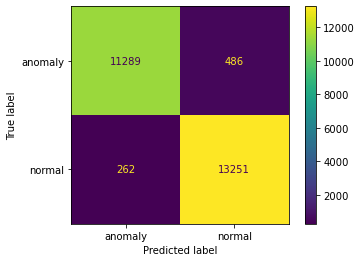

In [43]:
metrics(
    model=lr,
    df_validation_input=x_validation,
    df_validation_target=y_validation,
    df_prediction=yLr_prediction_val
)

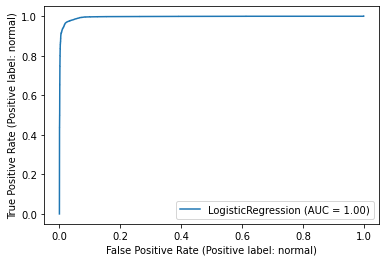

In [44]:
plot_roc_curve(lr, x_validation, y_validation)

#### Evaluación sobre datos de test

Matriz de confusión
 [[11297   508]
 [  276 13207]]
Accuracy: 0.968997152799747
Precisión: 0.9761513868486995
Recall: 0.9569673867005506
F1 score: 0.9664641971083925


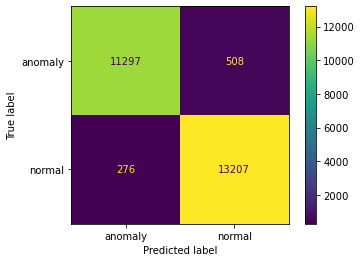

In [45]:
metrics(
    model=lr,
    df_validation_input=x_test,
    df_validation_target=y_test,
    df_prediction=yLr_prediction_test
)

### Árboles Desición

#### Evaluación sobre datos de validación

Matriz de confusión
 [[11729    46]
 [   60 13453]]
Accuracy: 0.9958082885162923
Precisión: 0.9949105097972687
Recall: 0.9960934182590233
F1 score: 0.9955016126294348


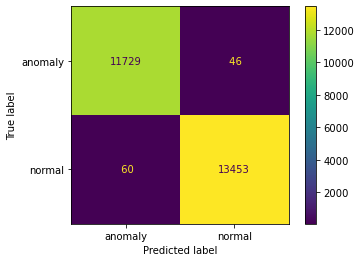

In [46]:
metrics(
    model=dtc,
    df_validation_input=x_validation,
    df_validation_target=y_validation,
    df_prediction=yTree_prediction_val
)

#### Evaluación sobre datos de test

Matriz de confusión
 [[11765    40]
 [   44 13439]]
Accuracy: 0.9966782663714014
Precisión: 0.9962740282835125
Recall: 0.9966116052520119
F1 score: 0.9964427881765054


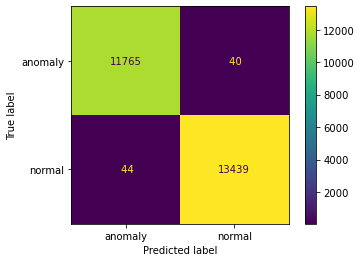

In [47]:
metrics(
    model=dtc,
    df_validation_input=x_test,
    df_validation_target=y_test,
    df_prediction=yTree_prediction_test
)

### Random Forest

#### Evaluación sobre datos de validación

Matriz de confusión
 [[11722    53]
 [   29 13484]]
Accuracy: 0.9967573552673205
Precisión: 0.9975321249255382
Recall: 0.9954989384288747
F1 score: 0.9965144946017171


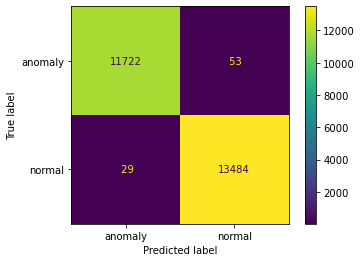

In [48]:
metrics(
    model=rfc,
    df_validation_input=x_validation,
    df_validation_target=y_validation,
    df_prediction=yForest_prediction_val
)

#### Evaluación sobre datos de test

Matriz de confusión
 [[11753    52]
 [   16 13467]]
Accuracy: 0.9973109775387535
Precisión: 0.9986404962188801
Recall: 0.9955950868276154
F1 score: 0.997115466191567


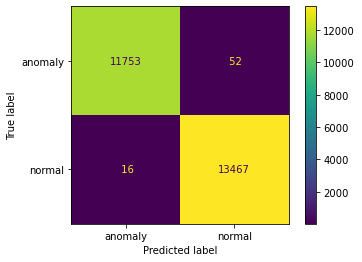

In [49]:
metrics(
    model=rfc,
    df_validation_input=x_test,
    df_validation_target=y_test,
    df_prediction=yForest_prediction_test
)